# kNN from scratch!
This will test your understanding of the kNN algorithm. You will implement the kNN algorithm from scratch and use it to classify an artificial dataset.
It will also test your understanding of python programming. 
Use the class skeleton to implement the kNN algorithm and the test function to test your implementation.
## 1.1. Implement two distance metrics
## 1.1.1 Implement the manhattan distance as a function of two numpy arrays
## 1.1.2 Implement the euclidean distance as a function of two numpy arrays
## 1.2. Implement the kNN algorithm
## Bonus: Implement the class in a way, so you can choose which of the two metrics to use



In [20]:
import numpy as np

def manhattan_distance(x1, x2):
    norm=np.sum(np.abs(x1-x2))
    return norm

def euclidean_distance(x1, x2):
    norm=np.linalg.norm(x1-x2 , ord=2)
    return norm


class KNN:
    def __init__(self, k=3 , distance='euclidean'):
        self.k=k
        if distance not in ['euclidean' , ' manhattan']:
           raise ValueError ('Distance must be either "euclidean" or "manhattan')
        self.distance = { 'euclidean' : euclidean_distance ,' manhattan' : manhattan_distance }[distance]
        

    def fit(self, X, y): #tested point 
        self.x=X
        self.y=y

   
    def predict(self, X):
        predictions = [self._predict_single(x) for x in X]
        return predictions
    
    def _predict_single(self, x :np.array):
        distance=[self.distance(x , test_x) for test_x in self.x]
        index = np.argsort(distance)[:self.k] 
        k_nearest_labels = self.y[index]       
        most_commen=np.bincount(k_nearest_labels).argmax() #count how many time the lowest point appears
        return most_commen
        
            
        

In [29]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

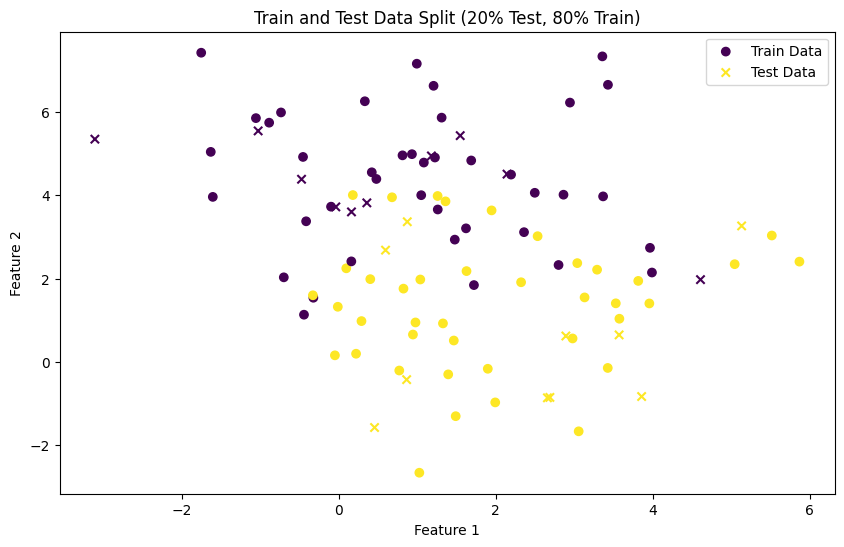

In [33]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.60, random_state=0,) #center = 2 type , n_feature = 2 dim , cluster_std= spred 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 20% test samples 
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train Data', cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test Data', cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Train and Test Data Split (20% Test, 80% Train)")
plt.legend()
plt.show()

In [26]:
for k in range(1, 22, 2): #start , stop , step
    knn = KNN(k=k, distance='euclidean')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    print(f'k={k}, accuracy={accuracy_score(y_test, predictions)}')

k=1, accuracy=0.8
k=3, accuracy=0.85
k=5, accuracy=0.95
k=7, accuracy=0.9
k=9, accuracy=0.9
k=11, accuracy=0.85
k=13, accuracy=0.9
k=15, accuracy=0.9
k=17, accuracy=0.9
k=19, accuracy=0.9
k=21, accuracy=0.9
